## Quiz6
#### Peeraya Khantaruangsakul 63070501054

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import math
from scipy.optimize import minimize
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. [2.5 hours.] Modify “Logistic Regression Gradient Descent.ipynb” for Iris classification to use the cost function and Jacobian function and the “BFGS” optimization method in SciPy library to: 

##### Prepare

In [2]:
# downlaod iris dataset
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.25, random_state=0)

In [4]:
X_av = np.mean(X_train, axis=0)
X_sd = np.std(X_train, axis=0)
X_train = (X_train - X_av)/X_sd 
X_test = (X_test - X_av)/X_sd 

In [5]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def h(theta, X):
  z = X @ theta # X is m x n, theta is n x 1. Result z is mx1. 
  return sigmoid(z) #returns vector mx1

def J(theta, X, y): 
  m = X.shape[0] #m - number of data points  
  n = X.shape[1] #n - no. features + 1, because first column X is all 1 for intercepts. 
  H = h(theta, X) 
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m 
  return cost #returns a scalar

def dJ_d_theta(theta, X, y):  
    m = X.shape[0] #m - number of data points  
    n = X.shape[1] #n - no. features + 1, because first column X is all 1 for intercepts.
    dJ_dt = X.T @ (h(theta, X) - y)/m # this is n x m * m x 1 to get n x 1 
    return dJ_dt #an array n x 1

In [6]:
m = X_train.shape[0] # m - number of data points
n = X_train.shape[1] + 1 #n - no. features + 1, because first column X is all 1 for intercepts.

# initialize theta
theta = (20* np.random.rand(n) - 10).T

In [7]:
theta, n, m

(array([-3.2408811 ,  4.68739215,  7.53009464,  8.37615293,  4.93871914]),
 5,
 112)

In [8]:
#set yN to 0 if y is not equal to N, 1 if y is equanl to N.  
y0_train = (y_train==0)*1.0 #yes/no of class 0
y1_train = (y_train==1)*1.0 #yes/no of class 1
y2_train = (y_train==2)*1.0 #yes/no of class 2
y0_test = (y_test ==0)*1.0
y1_test = (y_test ==1)*1.0
y2_test = (y_test ==2)*1.0

print("y_train_0: ",y_test)
print("y_test_0: ", y0_test)  #note that in y0_test only y with class 0 are set to 1, others to 0.\



y_train_0:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
y_test_0:  [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]


In [9]:
X_1_train = np.ones([m,n]) #create an array of all 1's
print("X_1_Train 5 rows All 1s = \n",X_1_train[0:5,:])

X_1_train[:, 1:] = X_train #leave column 1 as 1's, and replace all other data with X_train

X_1_test = np.ones([X_test.shape[0],X_test.shape[1] + 1]) #create an array of all 1's
X_1_test[:, 1:] = X_test #leave column 1 as 1's, and replace all other data with X_test

print("X_Train 5 rows = \n",X_train[0:5,:]) 
print("X_1_Train 5 rows = \n",X_1_train[0:5,:])

X_1_Train 5 rows All 1s = 
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
X_Train 5 rows = 
 [[ 0.01543995 -0.11925475  0.22512685  0.35579762]
 [-0.09984503 -1.04039491  0.11355956 -0.02984109]
 [ 1.05300481 -0.11925475  0.95031423  1.12707506]
 [-1.36797986  0.34131533 -1.39259884 -1.31530348]
 [ 1.1682898   0.11103029  0.72717965  1.38416753]]
X_1_Train 5 rows = 
 [[ 1.          0.01543995 -0.11925475  0.22512685  0.35579762]
 [ 1.         -0.09984503 -1.04039491  0.11355956 -0.02984109]
 [ 1.          1.05300481 -0.11925475  0.95031423  1.12707506]
 [ 1.         -1.36797986  0.34131533 -1.39259884 -1.31530348]
 [ 1.          1.1682898   0.11103029  0.72717965  1.38416753]]


In [10]:
def scipy_minimize_show(X_1_test, y_test, classN, x_train, y_train):
    res = minimize(J, theta, args=(X_1_train, y_train), method='BFGS', jac=dJ_d_theta, options={'disp': True})
    theta_solved = res.x 
    print(f"Class {classN} best fit parameters theta 0, 1, 2,..., n-1: {theta_solved}")
    predict_y_before =  h(theta_solved, X_1_test)
    predict_y = (predict_y_before > 0.5)*1.0
    print("Show 10 rows of test data: \n", X_test[:10, :])
    print("Target output of 10 rows of test data: \n", y_test[0:10])
    np.set_printoptions(precision=1,suppress=True) #print with 2 decimal places and suppress scientific notation
    print(f"Prediction if class {classN} before threshold: \n{predict_y_before}")
    print(f"Prediction if class {classN} after threshold: \n{predict_y}")
    print("Target output of 10 rows of test data: \n", y_test)
    correct= (((predict_y == y_test).sum())/len(y_test))*100
    print(f"Correct percent for predicting class {classN} : %5.1f%%"%correct)

def scipy_minimize_cal(X_1_test, y_test, classN, x_train, y_train):
    res = minimize(J, theta, args=(X_1_train, y_train), method='BFGS', jac=dJ_d_theta, options={'disp': False})
    theta_solved = res.x 
    predict_y_before =  h(theta_solved, X_1_test)
    predict_y = (predict_y_before > 0.5)*1.0
    correct= (((predict_y == y_test).sum())/len(y_test))*100
    return res, theta_solved, predict_y_before, predict_y, correct

In [11]:
scipy_minimize_show(X_1_test, y0_test, "0", X_1_train, y0_train)


         Current function value: nan
         Iterations: 4
         Function evaluations: 45
         Gradient evaluations: 45
Class 0 best fit parameters theta 0, 1, 2,..., n-1: [-4.57312564 -7.30144383 10.04237008 -4.59330353 -7.90980558]
Show 10 rows of test data: 
 [[-0.09984503 -0.57982483  0.72717965  1.51271377]
 [ 0.13072494 -1.96153508  0.11355956 -0.28693357]
 [-0.44569998  2.64416573 -1.33681519 -1.31530348]
 [ 1.62942973 -0.34953979  1.39658338  0.74143634]
 [-1.0221249   0.80188541 -1.28103155 -1.31530348]
 [ 0.47657989  0.57160037  1.22923245  1.64126001]
 [-1.0221249   1.03217045 -1.39259884 -1.18675724]
 [ 0.93771983  0.11103029  0.50404507  0.35579762]
 [ 1.05300481 -0.57982483  0.55982872  0.22725139]
 [ 0.24600992 -0.57982483  0.11355956  0.09870515]]
Target output of 10 rows of test data: 
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
Prediction if class 0 before threshold: 
[0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 

In [12]:
scipy_minimize_show(X_1_test, y1_test, "1", X_1_train, y1_train)

Optimization terminated successfully.
         Current function value: 0.476675
         Iterations: 32
         Function evaluations: 36
         Gradient evaluations: 36
Class 1 best fit parameters theta 0, 1, 2,..., n-1: [-1.2 -0.4 -1.1  2.8 -2.4]
Show 10 rows of test data: 
 [[-0.1 -0.6  0.7  1.5]
 [ 0.1 -2.   0.1 -0.3]
 [-0.4  2.6 -1.3 -1.3]
 [ 1.6 -0.3  1.4  0.7]
 [-1.   0.8 -1.3 -1.3]
 [ 0.5  0.6  1.2  1.6]
 [-1.   1.  -1.4 -1.2]
 [ 0.9  0.1  0.5  0.4]
 [ 1.1 -0.6  0.6  0.2]
 [ 0.2 -0.6  0.1  0.1]]
Target output of 10 rows of test data: 
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
Prediction if class 1 before threshold: 
[0.1 0.9 0.  0.6 0.1 0.1 0.1 0.2 0.5 0.4 0.9 0.2 0.7 0.4 0.5 0.1 0.3 0.8
 0.2 0.  0.2 0.3 0.2 0.4 0.3 0.  0.  0.4 0.7 0.1 0.3 0.4 0.1 0.2 0.3 0.4
 0.  0.6]
Prediction if class 1 after threshold: 
[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Target output of 10 rows of test data: 
 [0. 1. 0. 0. 0. 0. 0.

In [13]:
scipy_minimize_show(X_1_test, y2_test, "2", X_1_train, y2_train)

         Current function value: nan
         Iterations: 32
         Function evaluations: 59
         Gradient evaluations: 59
Class 2 best fit parameters theta 0, 1, 2,..., n-1: [-26.2  -4.5  -4.5  27.2  15.4]
Show 10 rows of test data: 
 [[-0.1 -0.6  0.7  1.5]
 [ 0.1 -2.   0.1 -0.3]
 [-0.4  2.6 -1.3 -1.3]
 [ 1.6 -0.3  1.4  0.7]
 [-1.   0.8 -1.3 -1.3]
 [ 0.5  0.6  1.2  1.6]
 [-1.   1.  -1.4 -1.2]
 [ 0.9  0.1  0.5  0.4]
 [ 1.1 -0.6  0.6  0.2]
 [ 0.2 -0.6  0.1  0.1]]
Target output of 10 rows of test data: 
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
Prediction if class 2 before threshold: 
[1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  1.  0.  0.  0.  0.8 0.  0.  0.  0.  0.  1.  0.  0.  0.8 1.  0.
 0.  1. ]
Prediction if class 2 after threshold: 
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
Target output of 10 rows of test data: 
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [14]:
predict_y_before = np.array((scipy_minimize_cal(X_1_test, y0_test, "0", X_1_train, y0_train)[2], scipy_minimize_cal(X_1_test, y1_test, "1", X_1_train, y1_train)[2], scipy_minimize_cal(X_1_test, y2_test, "2", X_1_train, y2_train)[2]))
print(scipy_minimize_cal(X_1_test, y0_test, "0", X_1_train, y0_train)[2])
print("------------------------------------------------------------------------------------------------------------------")
print(scipy_minimize_cal(X_1_test, y1_test, "1", X_1_train, y1_train)[2])
print("------------------------------------------------------------------------------------------------------------------")
print(scipy_minimize_cal(X_1_test, y2_test, "2", X_1_train, y2_train)[2])

[0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
------------------------------------------------------------------------------------------------------------------
[0.1 0.9 0.  0.6 0.1 0.1 0.1 0.2 0.5 0.4 0.9 0.2 0.7 0.4 0.5 0.1 0.3 0.8
 0.2 0.  0.2 0.3 0.2 0.4 0.3 0.  0.  0.4 0.7 0.1 0.3 0.4 0.1 0.2 0.3 0.4
 0.  0.6]
------------------------------------------------------------------------------------------------------------------
[1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  1.  0.  0.  0.  0.8 0.  0.  0.  0.  0.  1.  0.  0.  0.8 1.  0.
 0.  1. ]


In [15]:
max_class = []
for i in range(len(predict_y_before[0])):
    max_class.append(np.argmax(predict_y_before[:,i]))
max_class = np.array(max_class)
print("Class with max probability: \n", max_class)
print("Y test: \n", y_test)
is_correct_match = (max_class == y_test)
print("Is Correct Match: \n", is_correct_match)
correct = ((is_correct_match.sum())/len(y_test))*100
print("Correct percent for logistic class prediction: %5.1f%%"%correct)

Class with max probability: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Y test: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Is Correct Match: 
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]
Correct percent for logistic class prediction:  97.4%


##### a. [20 points.] Report the total classification accuracy (score) for the Test data by finding the highest probability class as the output.

In [16]:
print("Accuracy of class 0: %5.1f%%"%scipy_minimize_cal(X_1_test, y0_test, "0", X_1_train, y0_train)[4])
print("Accuracy of class 1: %5.1f%%"%scipy_minimize_cal(X_1_test, y1_test, "1", X_1_train, y1_train)[4])
print("Accuracy of class 2: %5.1f%%"%scipy_minimize_cal(X_1_test, y2_test, "2", X_1_train, y2_train)[4])

Accuracy of class 0: 100.0%
Accuracy of class 1:  68.4%
Accuracy of class 2:  97.4%


##### b. [5 points.] Print the confusion matrix for the test data of the 3 classes found by your own implementation of the logistic regressor. You can use Sklearn’s library; here’s an example of how:

In [17]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, max_class)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

##### c. [5 points.] Print the confusion matrix for the test data found by sklearn’s logistic regressor.

In [18]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Accuracy of logistic regression: %5.1f%%"%((logreg.score(X_test, y_test))*100))

# confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix
print("Confusion matrix for logistic regression: \n", confusion_matrix(y_test, logreg.predict(X_test)))

Accuracy of logistic regression:  97.4%
Confusion matrix for logistic regression: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


##### d. [10 points.] For each mis-classified data sample, show the classification probability for class 0, 1, and 2 (we want to see that the probabilities are hovering around the 0.2 to 0.9 range for these data points).

In [19]:
# probability wrong for 0, 1, 2 use before threshold
predict_y_before = np.array((scipy_minimize_cal(X_1_test, y0_test, "0", X_1_train, y0_train)[4], scipy_minimize_cal(X_1_test, y1_test, "1", X_1_train, y1_train)[4], scipy_minimize_cal(X_1_test, y2_test, "2", X_1_train, y2_train)[4]))
print("Probability wrong for class 0:", (100 - predict_y_before[0])/100)
print("Probability wrong for class 1:", (100 - predict_y_before[1])/100)
print("Probability wrong for class 2:", (100 - predict_y_before[2])/100)

Probability wrong for class 0: 0.0
Probability wrong for class 1: 0.31578947368421056
Probability wrong for class 2: 0.026315789473684247


### 2. [30 points. 3 hours.] Using the Kaggle open source dataset to predict Attrition (Will an employee

continue to stay with our company? based on several factors using Logistic Regression. Make sure you
show the confusion matrix. In the case of a Yes/No classification like this problem it shows false
positives and false negatives. The data is available in:
[Dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

> Attrition: target variable, Yes or No (1 or 0)

#### Download .csv file

In [20]:
# read the data https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset can use this https://raw.githubusercontent.com/nelson-wu/employee-attrition-ml/master/WA_Fn-UseC_-HR-Employee-Attrition.csv instead
data_ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Check data

In [21]:
data_ibm.shape

(1470, 35)

In [22]:
data_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
data_ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [24]:
# check duplicate rows
data_ibm.duplicated().sum()

0

#### Data correlation

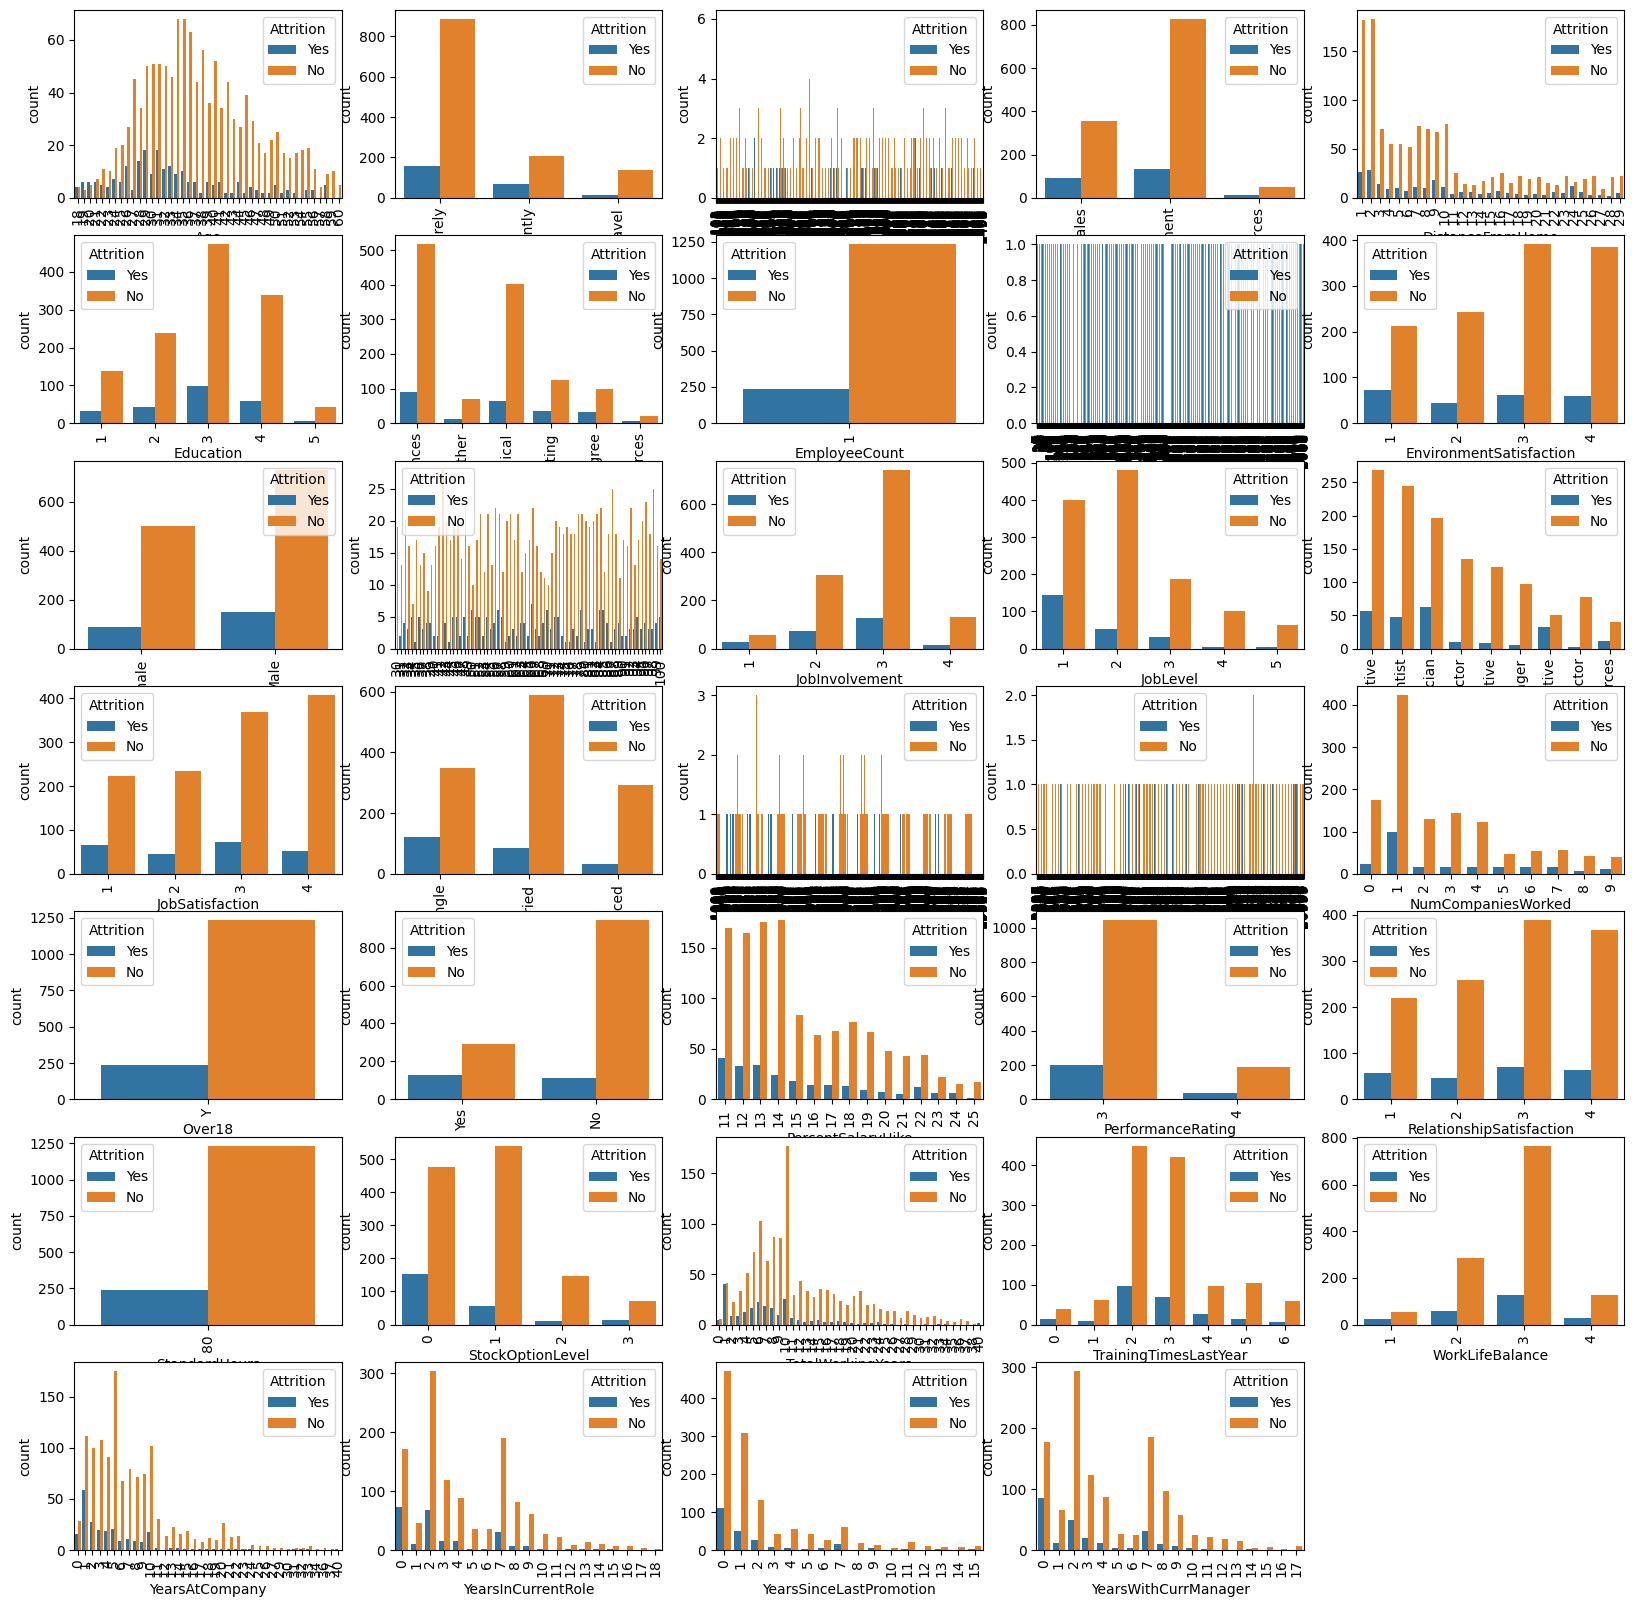

In [25]:
# plot graph for each column comparing attrition
fig = plt.figure(figsize=(20, 20))
cols = data_ibm.columns.drop('Attrition')
for i, variable in enumerate(cols):
    plt.subplot(7, 5, i+1)
    sns.countplot(x=variable, hue='Attrition', data=data_ibm)
    plt.xticks(rotation=90)
plt.show()


#### Prepare data

In [26]:
# change every column to categorical
for col in data_ibm.columns:
    data_ibm[col] = data_ibm[col].astype('category')


In [27]:
data_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   category
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   category
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   category
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   category
 9   EmployeeNumber            1470 non-null   category
 10  EnvironmentSatisfaction   1470 non-null   category
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   category
 13  JobInvolvement            1470 non-null   catego

#### Training and testing data

In [28]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_ibm.drop('Attrition', axis=1), data_ibm['Attrition'], test_size=0.2, random_state=66)

# one hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Accuracy of logistic regression: %5.1f%%"%((logreg.score(X_test, y_test))*100))

# confusion matrix for logistic regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Confusion matrix for logistic regression: \n", confusion_matrix(y_test, logreg.predict(X_test)))
# print("Classification report for logistic regression: \n", classification_report(y_test, logreg.predict(X_test)))

Accuracy of logistic regression:  88.4%
Confusion matrix for logistic regression: 
 [[241   7]
 [ 27  19]]


![Example 1](https://techdoctorcoin.files.wordpress.com/2020/10/confusion-matrix-recap.png)

ANSWER: false positives is 7 in data testing and false negatives is 27 in data testing